# Content-Based Filtering

Pernahkah anda bertanya-tanya bagaimana Netflix menyarankan film kepada Anda berdasarkan film yang sudah Anda tonton? Mungkin terlihat sederhana tetapi di belakang layar, algoritma statistik yang kompleks dijalankan untuk memprediksi rekomendasi ini.

Content-Based Filtering secara eksklusif menggunakan *historical* target pengguna. Content-Based Filtering melatih model regresi untuk masing-masing pengguna berdasarkan fitur konten. <br><br>
Data yang digunakan adalah data film dengan beberapa fiturnya, contohnya : Jenis, Genre, dll.<br>
Pada Content-Based Filtering dengan menggunakan data berikut, akan dicari kesamaan film berdasarkan beberapa fiturnya. Misalnya : Jika A menonton film Avengers, sistem akan dapat merekomendasikan film lain yang memiliki kesamaan dengan film Avengers. 

## Import Package

In [7]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Load Data

In [8]:
df = pd.read_csv('film.csv', delimiter=';')
df

,Movie,Jenis,Gendre,Rating,Duration
0,Avenger,Non Indo,Action,8.6,181
1,IT Chapter Two,Indo,Horror,7.0,169
2,Frozen 1,Non Indo,Animation,7.5,102
3,Gundala,Indo,Action,7.6,183
4,Dora and The Lost City of Gold,Non Indo,Adventure,6.8,102
5,The Conjuring,Non Indo,Horror,7.5,112
6,Bumi Manusia,Indo,Drama,7.2,181
7,Habibie & Ainun,Indo,Drama,7.6,120
8,Fast & Furious Presents : Hobbs & Shaw,Non Indo,Action,6.8,137
9,Incredibles 2,Non Indo,Animation,7.7,118


## Data Visualization and Preprocessing

In [9]:
df.groupby('Movie')['Rating'].mean().head()

Movie
AADC 1                            7.8
Avenger                           8.6
Bumi Manusia                      7.2
Cars                              8.0
Dora and The Lost City of Gold    6.9
Name: Rating, dtype: float64

#### Karena pada data terdapat beberapa film yang di rating lebih dari 1x maka digunakan rata-rata(mean) dari rating tersebut

In [10]:
df.groupby('Movie')['Rating'].count().sort_values(ascending=False).head()

Movie
The Conjuring                     2
IT Chapter Two                    2
Gundala                           2
Frozen 1                          2
Dora and The Lost City of Gold    2
Name: Rating, dtype: int64

In [11]:
ratings_mean_count = pd.DataFrame(df.groupby('Movie')['Rating'].mean())

In [12]:
ratings_mean_count['rating_counts'] = pd.DataFrame(df.groupby('Movie')['Rating'].count())

In [13]:
ratings_mean_count.head()

,Rating,rating_counts
Movie,,
AADC 1,7.8,1
Avenger,8.6,1
Bumi Manusia,7.2,1
Cars,8.0,1
Dora and The Lost City of Gold,6.9,2


### Bar Plot to visualized the ratings

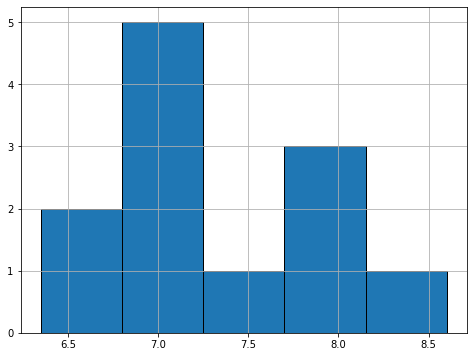

In [14]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['Rating'].hist(bins=5)

## Change Categorical to Numerical

In [16]:
from sklearn.preprocessing import LabelEncoder
df['Jenis'] = LabelEncoder().fit_transform(df['Jenis'])
df['Gendre'] = LabelEncoder().fit_transform(df['Gendre'])

In [17]:
df_new = df[['Jenis','Gendre','Rating','Duration']]

## Create new index

In [18]:
df_new.index = df['Movie']

In [19]:
df_new

,Jenis,Gendre,Rating,Duration
Movie,,,,
Avenger,1,0,8.6,181
IT Chapter Two,0,4,7.0,169
Frozen 1,1,2,7.5,102
Gundala,0,0,7.6,183
Dora and The Lost City of Gold,1,1,6.8,102
The Conjuring,1,4,7.5,112
Bumi Manusia,0,3,7.2,181
Habibie & Ainun,0,3,7.6,120
Fast & Furious Presents : Hobbs & Shaw,1,0,6.8,137


## Normalized with MinMax

In [20]:
scal = MinMaxScaler()
df_new = scal.fit_transform(df_new)

## Find Cosine Similarity
Dengan menggunakan cosine similarity kita dapat melihat film film yang memiliki nilai yang besar adalah film yang memiliki banyak kesamaan.

In [21]:
result_df = pd.DataFrame(cosine_similarity(df_new,df_new), columns=df['Movie'], index=df['Movie'])

In [22]:
result_df

Movie,Avenger,IT Chapter Two,Frozen 1,Gundala,Dora and The Lost City of Gold,The Conjuring,Bumi Manusia,Habibie & Ainun,Fast & Furious Presents : Hobbs & Shaw,Incredibles 2,IT Chapter Two,Cars,Dora and The Lost City of Gold,Frozen 1,The Conjuring,AADC 1,Gundala
Movie,,,,,,,,,,,,,,,,,
Avenger,1.000000,0.554920,0.746793,0.799504,0.755466,0.665148,0.657114,0.509717,0.928106,0.829673,0.491916,0.836763,0.768283,0.640752,0.459422,0.618311,0.761549
IT Chapter Two,0.554920,1.000000,0.468529,0.699964,0.314283,0.662529,0.977379,0.885386,0.364685,0.555238,0.989791,0.559238,0.326496,0.397514,0.553913,0.947651,0.694817
Frozen 1,0.746793,0.468529,1.000000,0.298532,0.974763,0.952649,0.433726,0.619174,0.850171,0.988580,0.411301,0.985961,0.979452,0.951830,0.808599,0.576385,0.220423
Gundala,0.799504,0.699964,0.298532,1.000000,0.239499,0.312216,0.833028,0.558654,0.526175,0.432784,0.644746,0.453660,0.263469,0.132863,0.071049,0.721304,0.984758
Dora and The Lost City of Gold,0.755466,0.314283,0.974763,0.239499,1.000000,0.880169,0.300478,0.435281,0.908397,0.959748,0.265419,0.951715,0.998933,0.959813,0.777091,0.407752,0.176835
The Conjuring,0.665148,0.662529,0.952649,0.312216,0.880169,1.000000,0.591435,0.757414,0.735070,0.950495,0.628069,0.943728,0.882512,0.929330,0.902743,0.713806,0.254205
Bumi Manusia,0.657114,0.977379,0.433726,0.833028,0.300478,0.591435,1.000000,0.831291,0.431475,0.542205,0.957831,0.550043,0.315719,0.338713,0.449606,0.932168,0.830773
Habibie & Ainun,0.509717,0.885386,0.619174,0.558654,0.435281,0.757414,0.831291,1.000000,0.342477,0.658098,0.824700,0.676821,0.459649,0.464121,0.519767,0.973197,0.476097
Fast & Furious Presents : Hobbs & Shaw,0.928106,0.364685,0.850171,0.526175,0.908397,0.735070,0.431475,0.342477,1.000000,0.891743,0.321121,0.884951,0.908408,0.824823,0.625289,0.411559,0.498328


## Correlation with heatmap

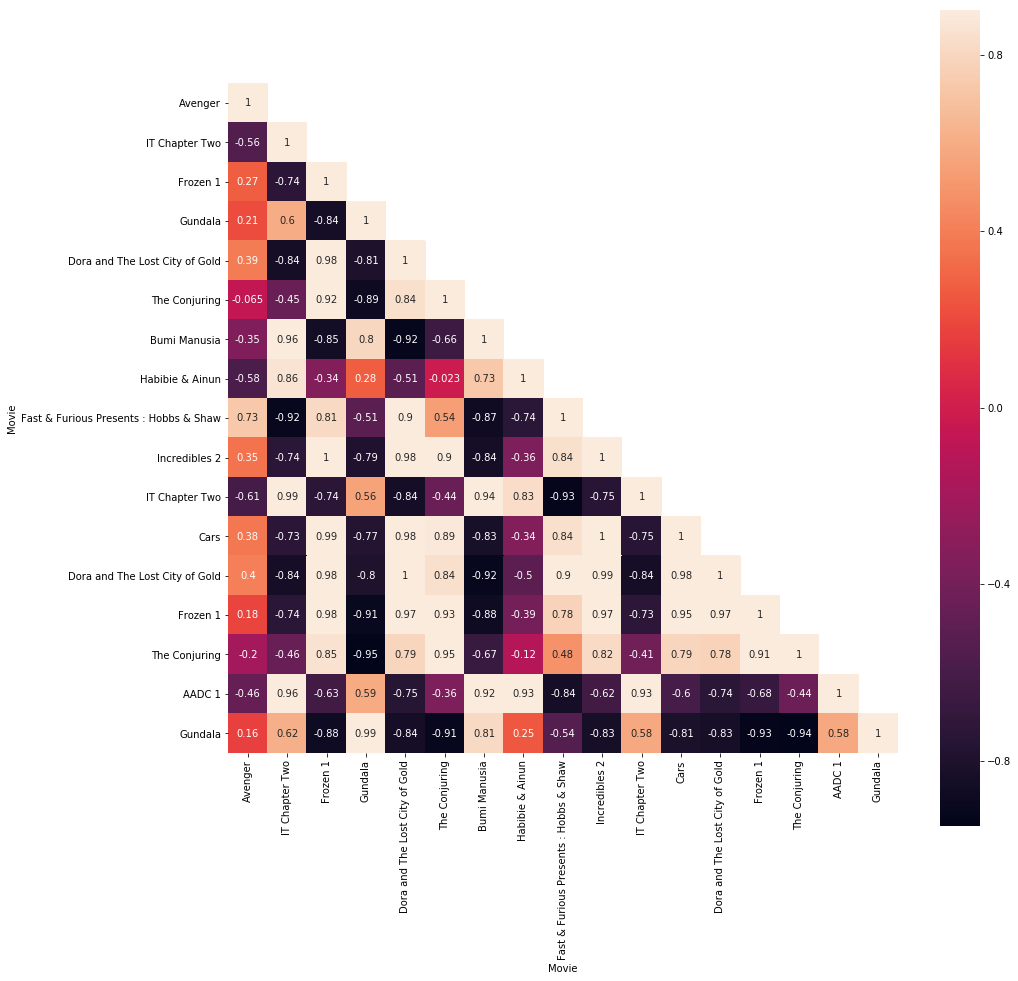

In [160]:
corr = result_df.corr(method = 'pearson')
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,15))
fig.set_size_inches(15,15)
sns.heatmap(corr, mask = mask, vmax = 0.9, square = True, annot = True)

### Initialize movie that have been watched

In [38]:
film = ['Avenger']

In [39]:
rec = result_df[film]

In [40]:
rec

Movie,Avenger
Movie,
Avenger,1.000000
IT Chapter Two,0.554920
Frozen 1,0.746793
Gundala,0.799504
Dora and The Lost City of Gold,0.755466
The Conjuring,0.665148
Bumi Manusia,0.657114
Habibie & Ainun,0.509717
Fast & Furious Presents : Hobbs & Shaw,0.928106


### Result of movie reccomendation
Dibawah ini ada rekomendasi film yang memiliki kesamaan dengan film yang telah ditonton, diurutkan berdasarkan yang paling mirip.

In [41]:
rec['Avenger'].sort_values(ascending=False)

Movie
Avenger                                   1.000000
Fast & Furious Presents : Hobbs & Shaw    0.928106
Cars                                      0.836763
Incredibles 2                             0.829673
Gundala                                   0.799504
Dora and The Lost City of Gold            0.768283
Gundala                                   0.761549
Dora and The Lost City of Gold            0.755466
Frozen 1                                  0.746793
The Conjuring                             0.665148
Bumi Manusia                              0.657114
Frozen 1                                  0.640752
AADC 1                                    0.618311
IT Chapter Two                            0.554920
Habibie & Ainun                           0.509717
IT Chapter Two                            0.491916
The Conjuring                             0.459422
Name: Avenger, dtype: float64

# Conclusion
*Recommender System* dapat dilihat sebagai informasi sampingan yang penting dan mempengaruhi tujuan rekomendasi. Berbagai tipe data seperti data temporal, data spasial, data sosial, dll dapat dieksplorasi. Dengan menggunakan Content-Based Filtering sebuah sistem dapat memberikan rekomendasi
